In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [8]:
Y_train = pd.read_csv('./csv/Y_train.csv')
Y_test = pd.read_csv('./csv/Y_test.csv')
X_train = pd.read_csv('./csv/X_train.csv')
X_test = pd.read_csv('./csv/X_test.csv')

In [9]:
## 모델별로 주석처리후 돌려보기
model = LogisticRegression()
# model = DecisionTreeClassifier()
# model = RandomForestClassifier()
# model = SVC()
# model = XGBClassifier()

model.fit(X_train, Y_train)
pred_proba = model.predict_proba(X_test)
pred = model.predict(X_test)

accuracy score : 0.872
precision score : 0.157
recall score : 0.724
f1 score : 0.258
roc score : 0.800


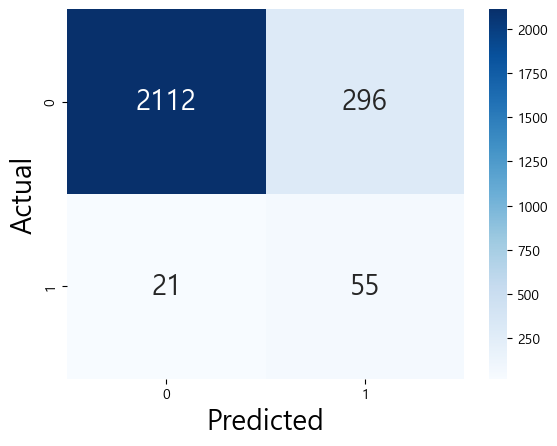

In [10]:
def score(y_test, pred):
    # score print
    print('accuracy score : {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('precision score : {0:.3f}'.format(precision_score(y_test, pred)))
    print('recall score : {0:.3f}'.format(recall_score(y_test, pred)))
    print('f1 score : {0:.3f}'.format(f1_score(y_test, pred)))
    print('roc score : {0:.3f}'.format(roc_auc_score(y_test, pred)))
    # confusion matirx 함수
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)

score(Y_test, pred)

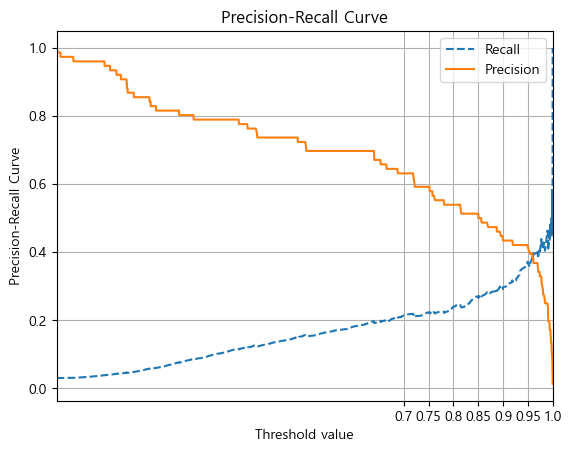

In [21]:
threshold = [0.7, 0.75,0.8,0.85, 0.9,0.95, 1]
new_X_train = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
custom_thre = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_thre).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

precision, recall, thresholds = precision_recall_curve(Y_test, pred_proba[:, 1])
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='Recall')
plt.plot(thresholds, recall[0:threshold_boundary], label='Precision')
plt.xlim([0, 1])
plt.xticks(threshold, np.round(threshold, 2))

plt.title('Precision-Recall Curve')
plt.xlabel('Threshold value')
plt.ylabel('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


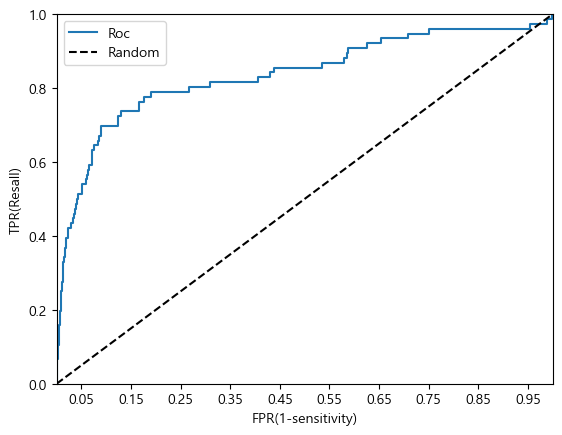

In [19]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='Roc')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(Resall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(Y_test, pred_proba[:, 1])